In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC

from pandas import DataFrame

In [2]:
# Read data in the excel file
df = pd.read_csv('dataset.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Get min, max and average of the age
print('Min age: ', min(df['Age']))
print('Max age: ', max(df['Age']))
print('Average age: ', df['Age'].mean())

Min age:  21
Max age:  81
Average age:  33.240885416666664


In [4]:
df = df.drop(df.index[df['Age'] < 30])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
765,5,121,72,23,112,26.2,0.245,30,0


In [5]:
df = df.drop(df.index[df['Age'] > 60])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
765,5,121,72,23,112,26.2,0.245,30,0


In [6]:
df.to_csv(r'g2.csv')

In [7]:
# Read data in the excel file
data = pd.read_csv('g2.csv')
data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,4,0,137,40,35,168,43.1,2.288,33,1
4,5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
340,757,0,123,72,0,0,36.3,0.258,52,1
341,761,9,170,74,31,0,44.0,0.403,43,1
342,762,9,89,62,0,0,22.5,0.142,33,0
343,765,5,121,72,23,112,26.2,0.245,30,0


In [8]:
#print('Max Glucose: ', max(data['Glucose']))

In [9]:
#data_g1 = data.loc[data['Glucose'] == 197]
#data_g1

In [10]:
# a simple line plot
#data_g1.plot(kind='bar', grid = True,figsize = (20,10))

In [11]:
#data_g1.plot(kind='bar')
#plt.show()

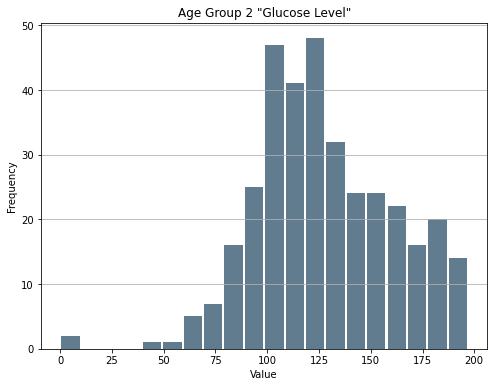

In [12]:
data['Glucose'].plot(kind = 'hist', title = 'Glucose', figsize = (8, 6),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 2 "Glucose Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

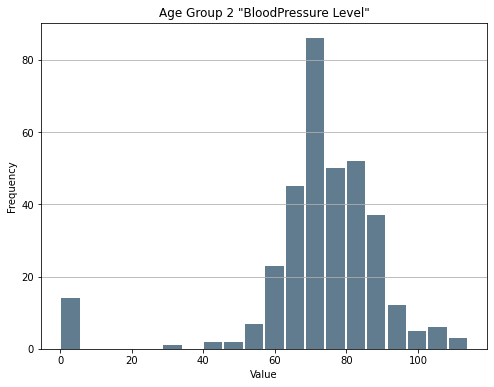

In [13]:
data['BloodPressure'].plot(kind = 'hist', title = 'BloodPressure', figsize = (8, 6),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 2 "BloodPressure Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

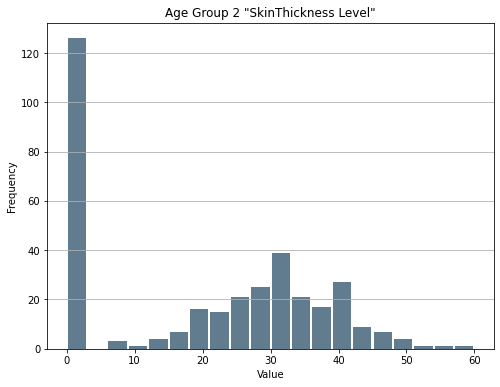

In [14]:
data['SkinThickness'].plot(kind = 'hist', title = 'SkinThickness', figsize = (8, 6),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 2 "SkinThickness Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

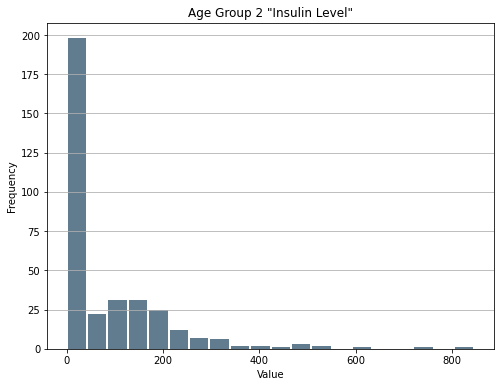

In [15]:
data['Insulin'].plot(kind = 'hist', title = 'Insulin', figsize = (8, 6),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 2 "Insulin Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

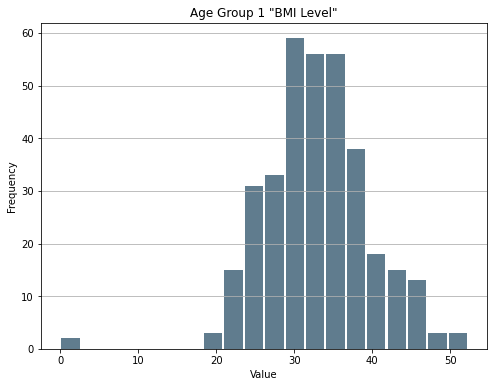

In [17]:
data['BMI'].plot(kind = 'hist', title = 'BMI', figsize = (8, 6),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 1 "BMI Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

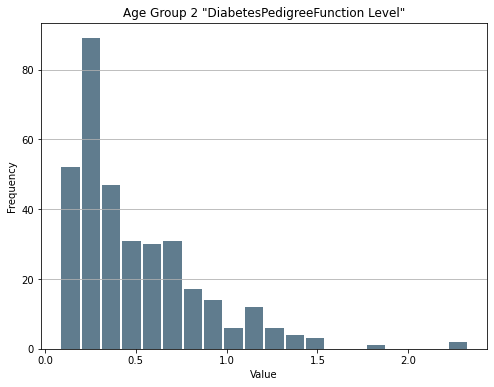

In [16]:
data['DiabetesPedigreeFunction'].plot(kind = 'hist', title = 'DiabetesPedigreeFunction', figsize = (8, 6),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 2 "DiabetesPedigreeFunction Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()